In [1]:
#importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading csv file using pandas read_csv method
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
#printing out first 5 rows from the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#checking more info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#dropping unnecessary columns
df = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.Geography.nunique()

3

# Data Exploring

<AxesSubplot:>

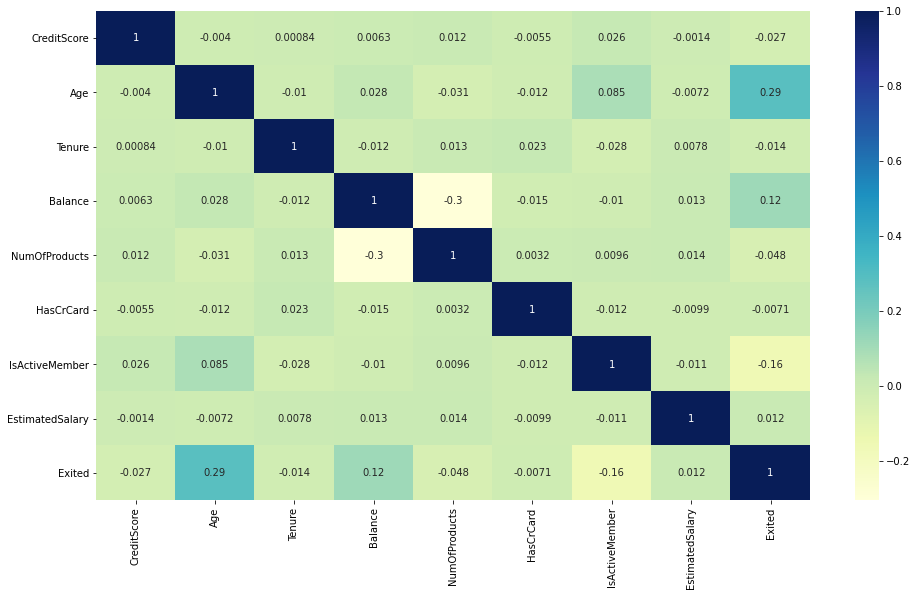

In [8]:
plt.figure(figsize= (16,9))
sns.heatmap(df.corr(),cmap='YlGnBu',annot = True)

we look at the heatmap of correlations between the features of the dataframe, we notice that correlation with Age is slighly positive which means the older the customer is, the more the customer tends to exit the company.
we also see, correlation with Exited and IsActiveMember is slighly negative which shows inactive member tends to leave the company. NumOfProducts and Balance is also negatively related. Number of Products increases, Balance decreases.

/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='Age'>

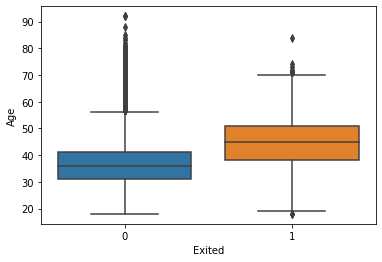

In [9]:
sns.boxplot('Exited','Age',data=df)

/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='Balance'>

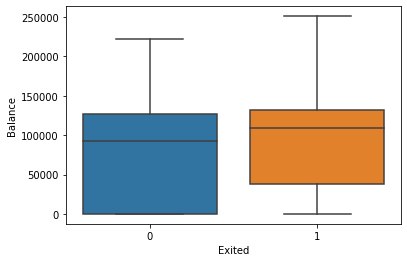

In [10]:
sns.boxplot('Exited','Balance',data=df)

<AxesSubplot:xlabel='NumOfProducts', ylabel='Balance'>

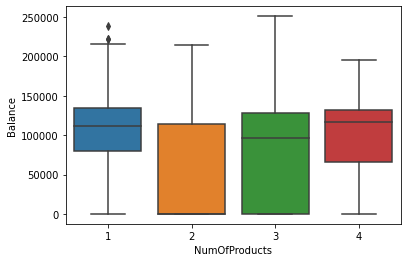

In [11]:
sns.boxplot(y='Balance',x='NumOfProducts',data=df)

/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='count'>

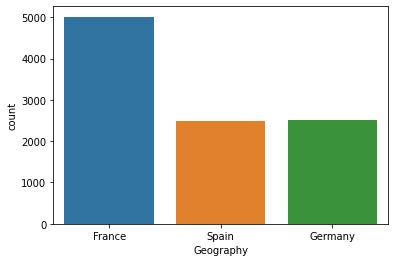

In [12]:
sns.countplot('Geography',data=df)

/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

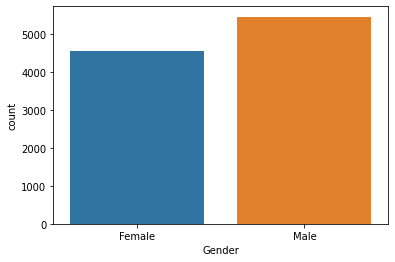

In [13]:
sns.countplot('Gender',data=df)

/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='count'>

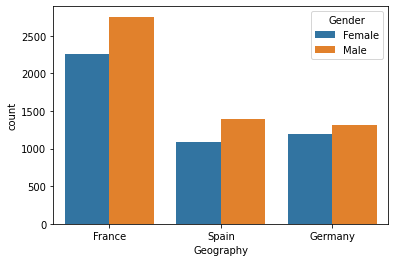

In [14]:
sns.countplot('Geography',data=df,hue='Gender')

In [15]:
df = pd.get_dummies(df ,['Geography','Gender'],drop_first= True)

In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

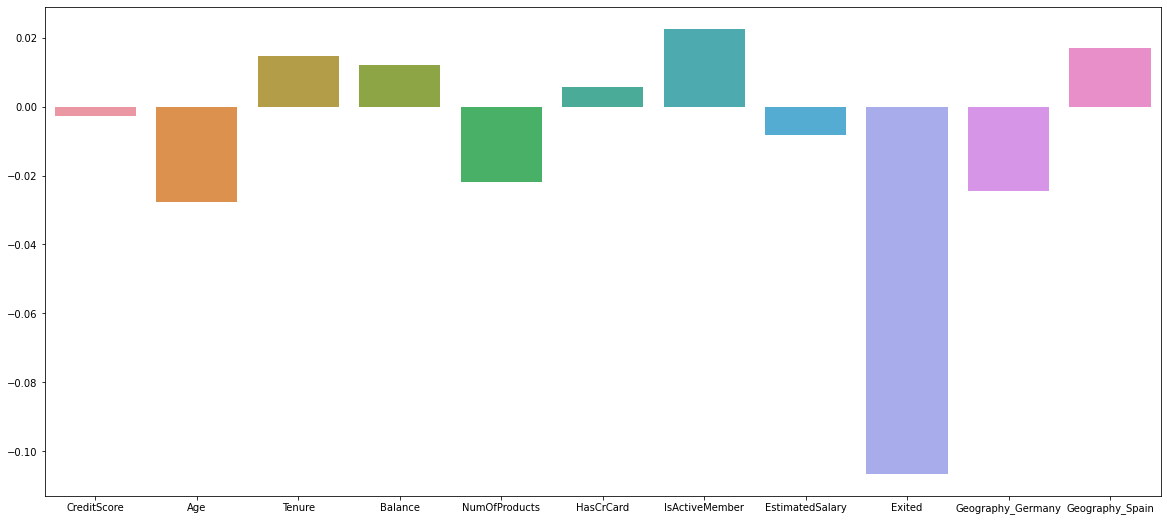

In [17]:
plt.figure(figsize=(20,9))
corr = (dict(df.drop(['Gender_Male'],axis=1).corrwith(df.Gender_Male)))
sns.barplot(list(corr.keys()),list(corr.values()))

We can see, Gender_Male is negatively related with Exited that means females are more likely to exit the company

# building predicting model

first we need to see which features don't relate much with Exited

/home/masud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

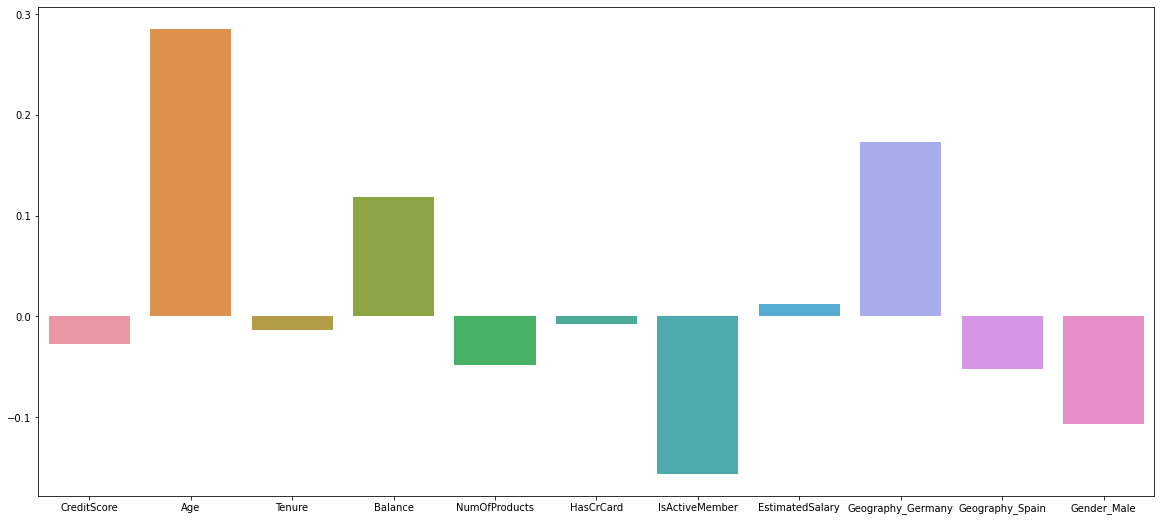

In [18]:
plt.figure(figsize=(20,9))
rel_with_exit = dict(df.drop(['Exited'],axis=1).corrwith(df.Exited))
sns.barplot(list(rel_with_exit.keys()), list(rel_with_exit.values()))

In [19]:
df1= df.drop(['Tenure','HasCrCard','EstimatedSalary','CreditScore'],axis=1)

In [20]:
X= df.drop(['Exited'],axis=1)
Y = df.Exited
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X,Y = smote.fit_sample(X,Y)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.2,stratify= Y)

In [21]:
x_train.shape,y_train.shape

((12740, 11), (12740,))

In [22]:
#importing logistic regression, randomforest,decisiontree, support vector, gaussiannb model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [23]:
lr = LogisticRegression()
rf = RandomForestClassifier()
Dt = DecisionTreeClassifier()
svm = SVC()
naive = GaussianNB()

In [24]:
models = [lr,rf,Dt,svm,naive]
scores = {}
for model in models:
    model.fit(x_train,y_train)
    scores[model] = model.score(x_test,y_test)

In [25]:
scores

{LogisticRegression(): 0.6876961707470182,
 RandomForestClassifier(): 0.8656622724419335,
 DecisionTreeClassifier(): 0.7919020715630886,
 SVC(): 0.566541117388575,
 GaussianNB(): 0.7181418706842435}

We see, RandomForestClassifier performs best in this database
so we will do hyper tuning RandomForest

In [26]:
rf = RandomForestClassifier(criterion='gini')
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8625235404896422

In [27]:
y_pred = rf.predict(x_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1593
           1       0.85      0.87      0.86      1593

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [34]:
print(y_test.value_counts())

1    1593
0    1593
Name: Exited, dtype: int64


<AxesSubplot:>

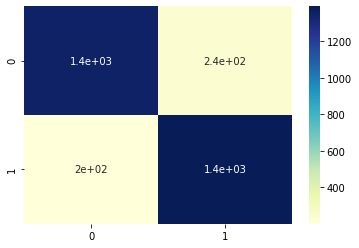

In [30]:
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,cmap='YlGnBu',annot=True)

In [37]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(rf,x_train,y_train,cv = 5)
cross_val.mean()

0.8544740973312402

so, avarage accuracy rate is 85% which is pretty good.
now we save the model using pickle

In [38]:
import pickle

In [39]:
pickle.dump(rf,open('churn_model','wb'))

In [40]:
model = pickle.load(open('churn_model','rb'))

In [41]:
model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 1])